  **This is the IN CLASS ASIGNMENT ON OCT 27TH for section *003*.**

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [3]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [4]:
def u_initial(nx,xend):
    x = numpy.linspace(0,xend,nx)
    u = numpy.ones(nx)
    lbound = numpy.where(x >= xend/2)
    ubound = numpy.where(x <= xend)
    u[numpy.intersect1d(lbound, ubound)]=0
    return u

In [5]:
nx = 81
nt = 70
dx = 4.0/(nx-1)
xend = 4

u=u_initial(nx,xend)

In [6]:
computeF = lambda u: (u/2)**2

In [7]:
def maccormack(u, nt, dt, dx, epsilon):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    
    for n in range(1,nt):
        F = computeF(u) #81
        
        ustar[1:-1] = u[1:-1]-dt/dx*(F[2:]-F[1:-1])+epsilon*(u[2:]-2*u[1:-1]+u[0:-2]) #80operation
        
        Fstar = computeF(ustar) #81
        
        #u80operaion ustar80operation Fstar80operation Fstar80operation
        un[n,1:] = .5*(u[1:]+ustar[1:]-dt/dx*(Fstar[1:]-Fstar[0:-1]))
        
        u = un[n].copy()
        
    return un

In [8]:
def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,


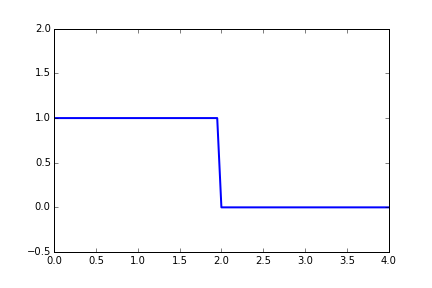
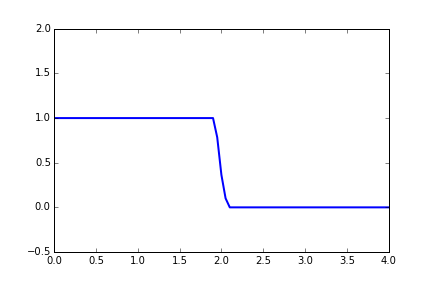
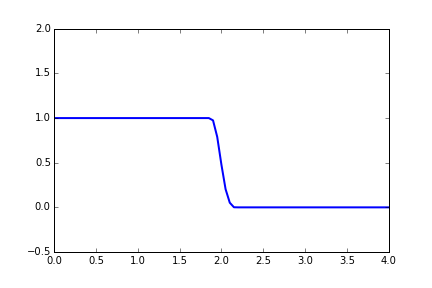
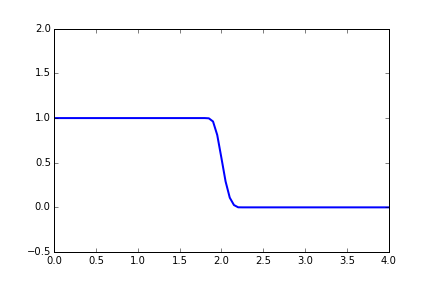
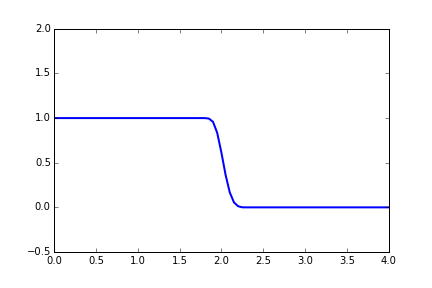
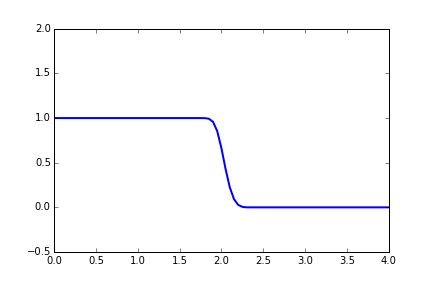
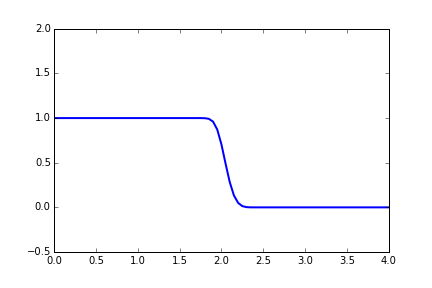
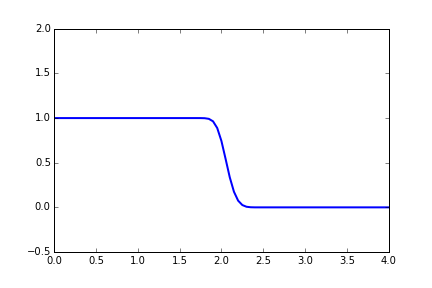
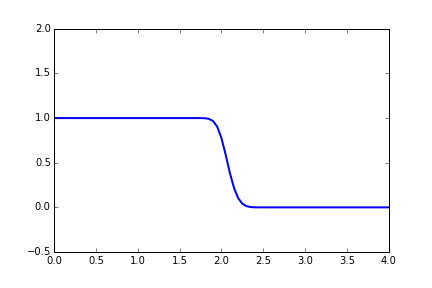
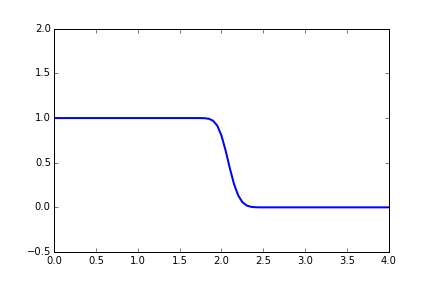
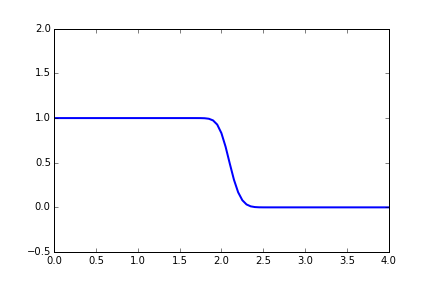
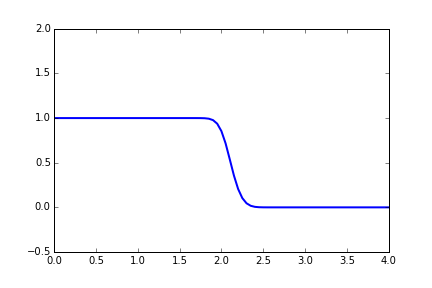
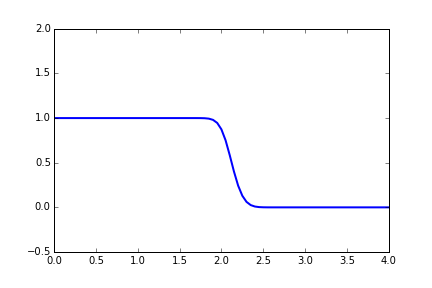
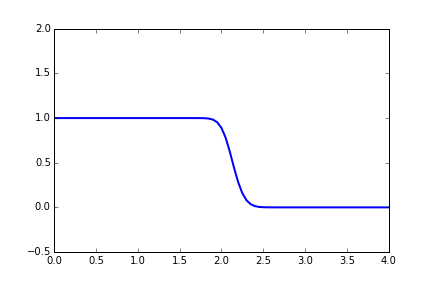
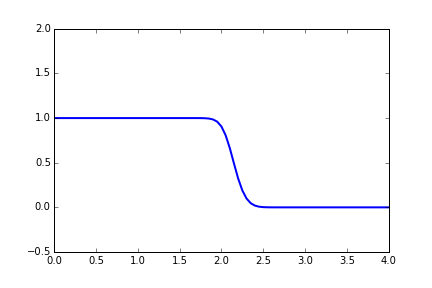
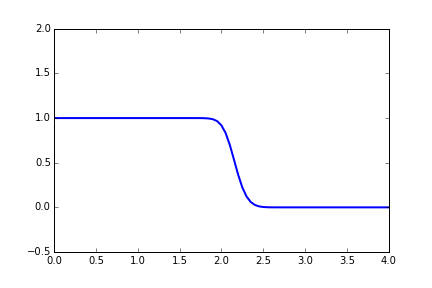
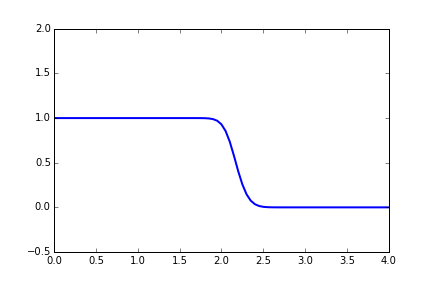
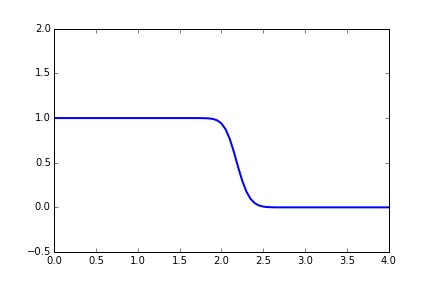
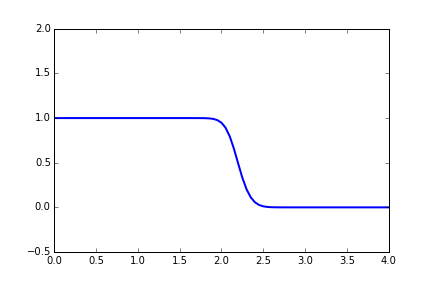
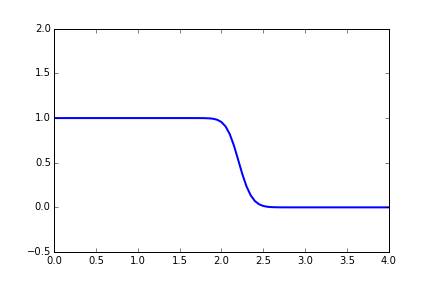
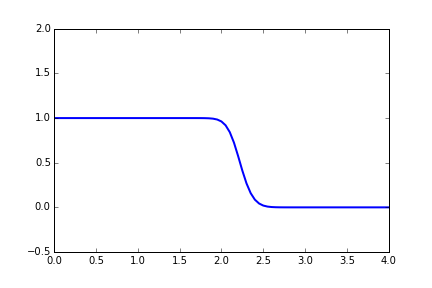
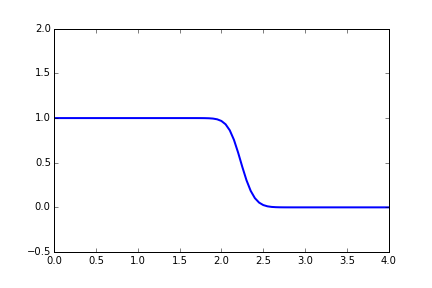
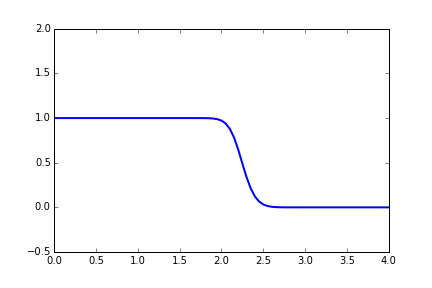
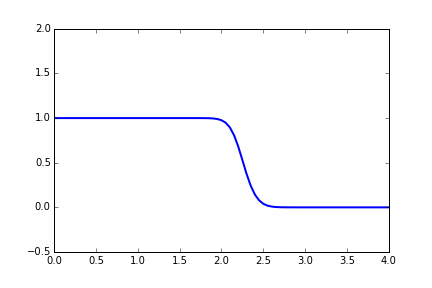
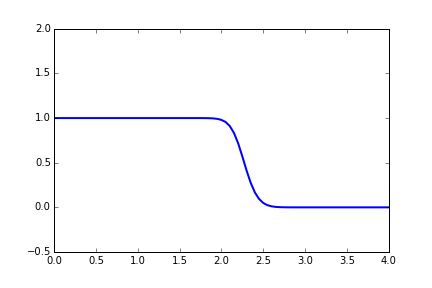
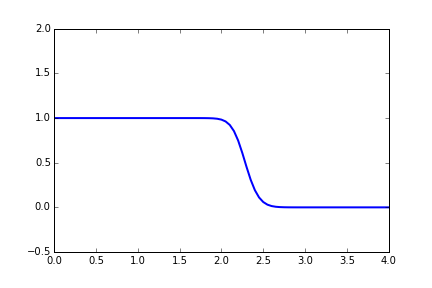
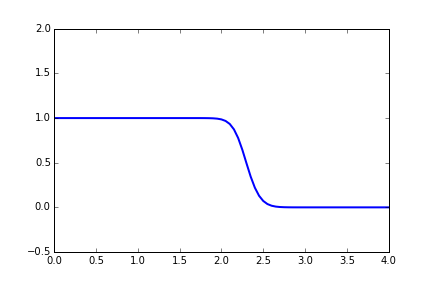
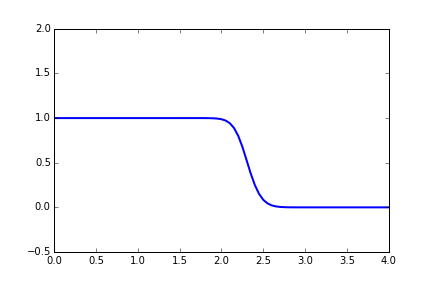
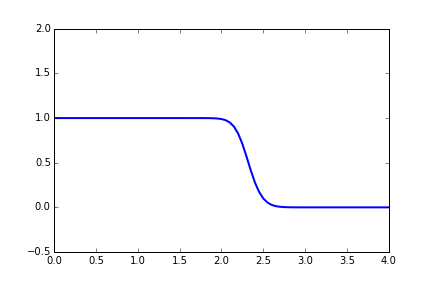
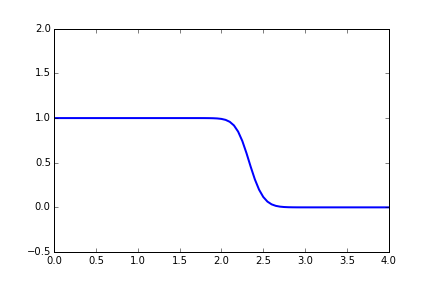
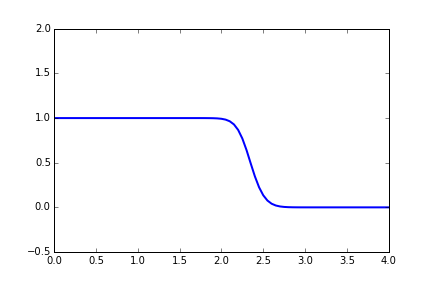
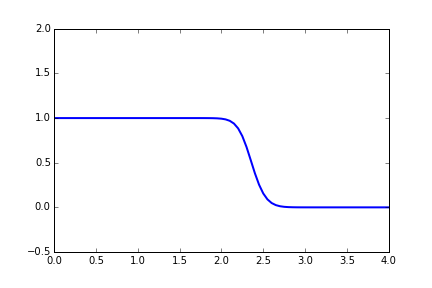
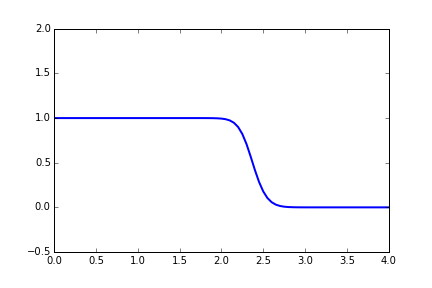
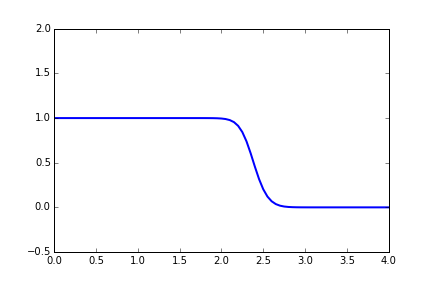
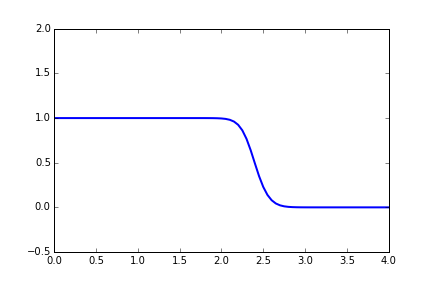
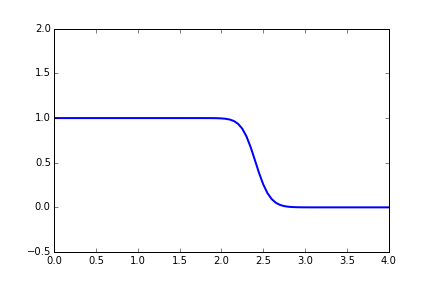
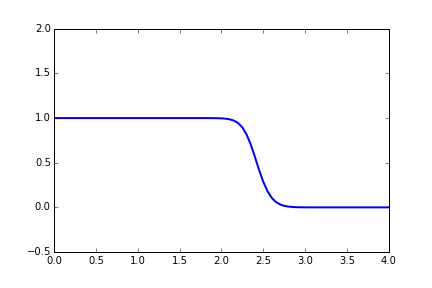
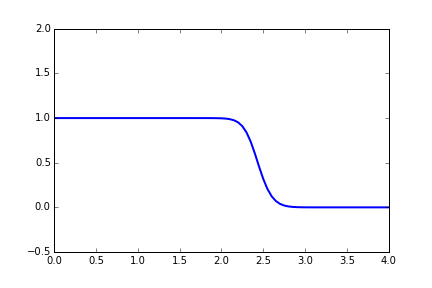
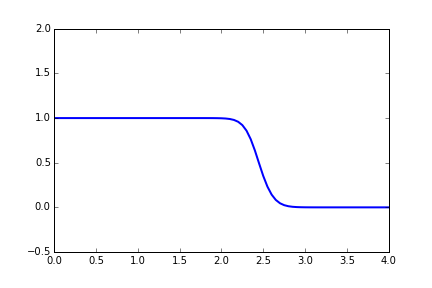
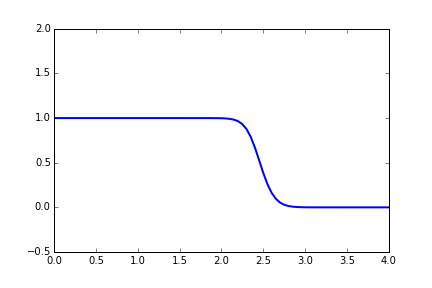
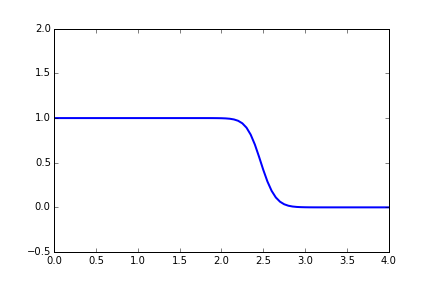
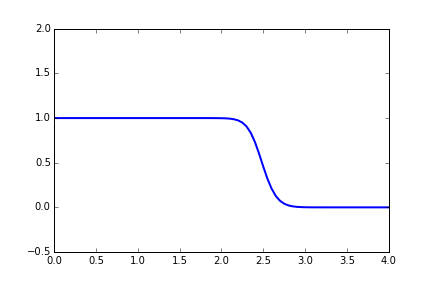
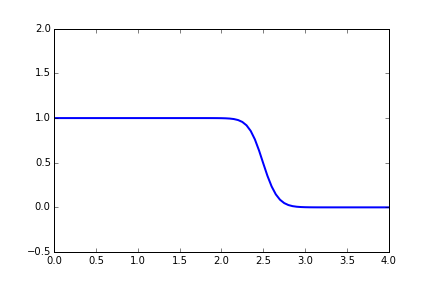
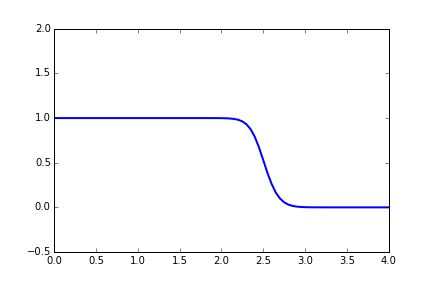
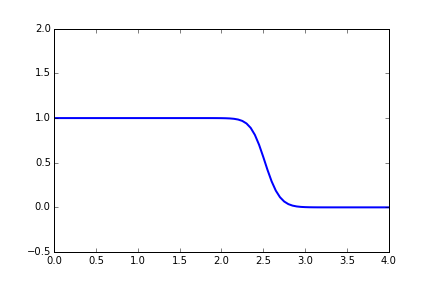
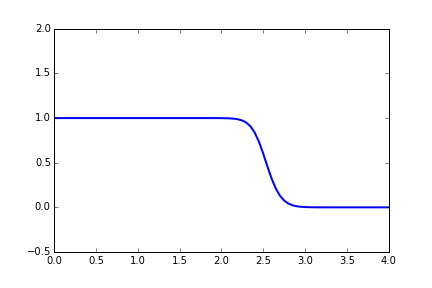
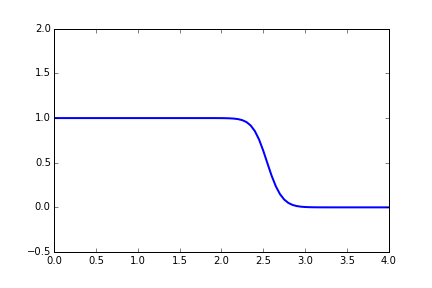
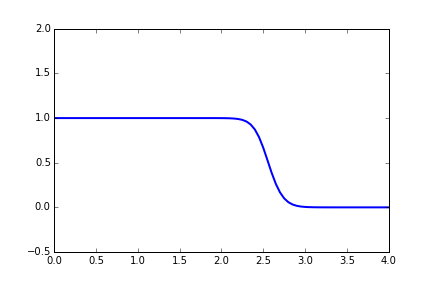
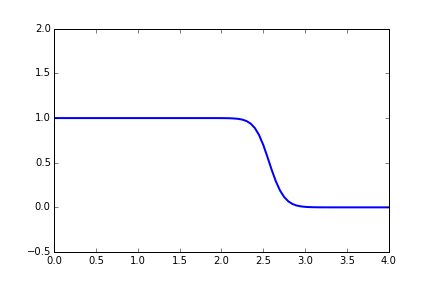
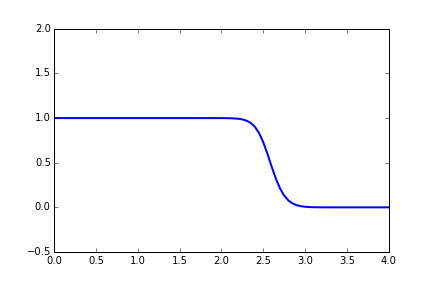
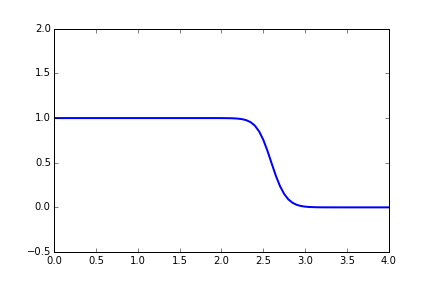
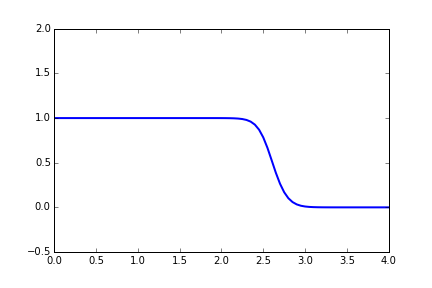
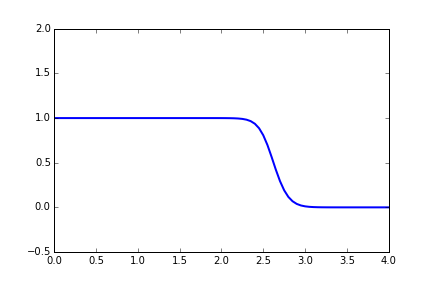
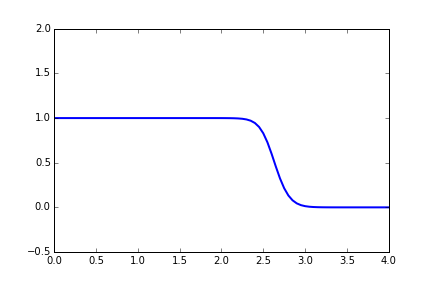
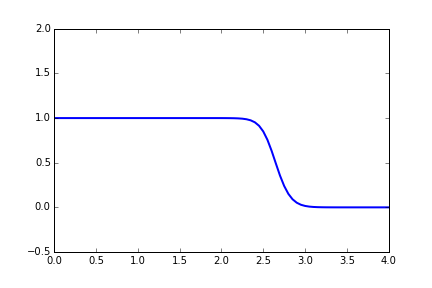
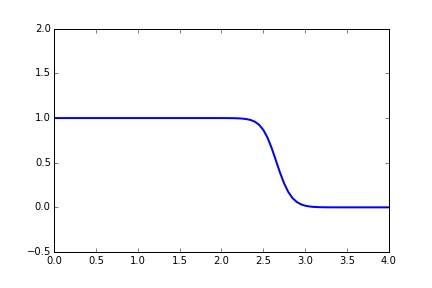
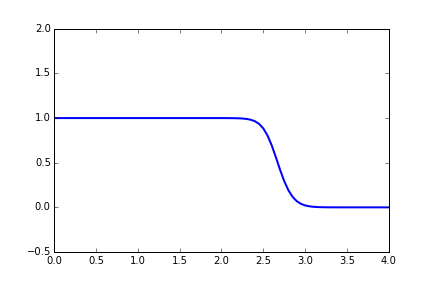
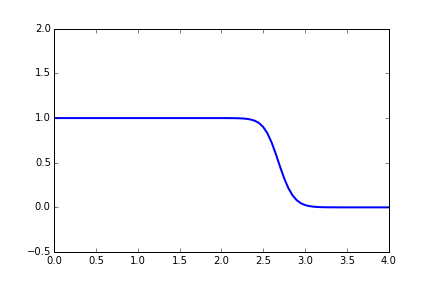
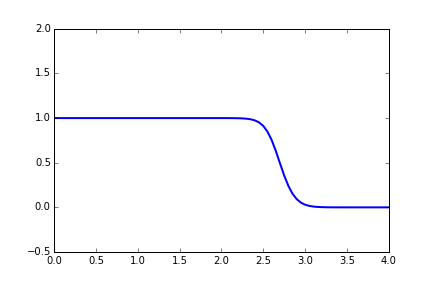
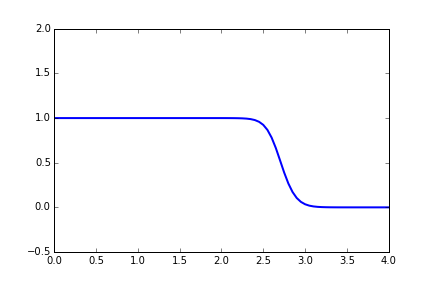
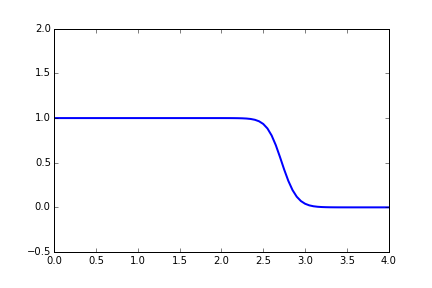
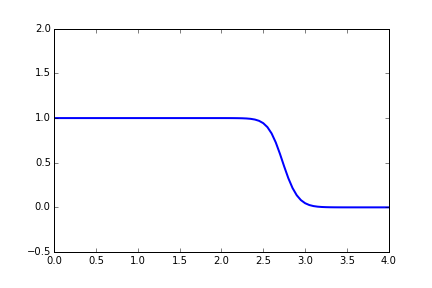
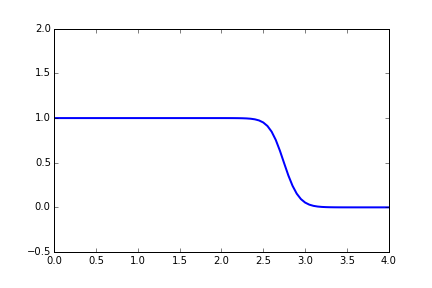
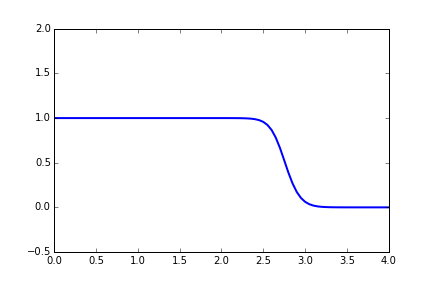
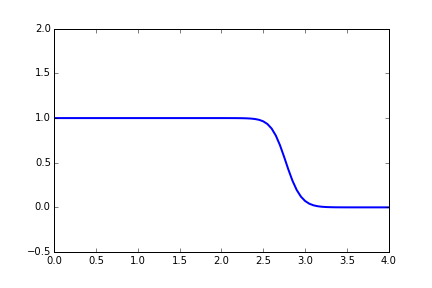
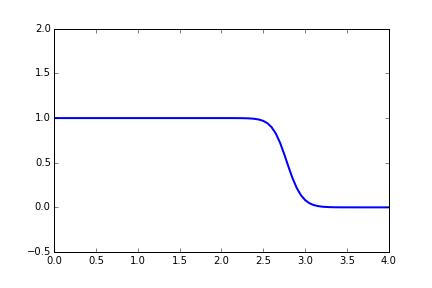
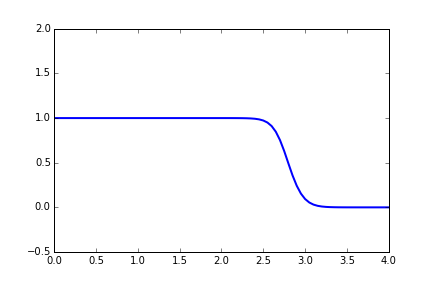
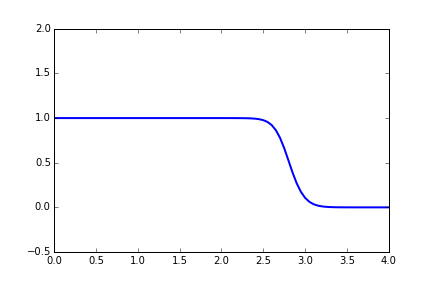
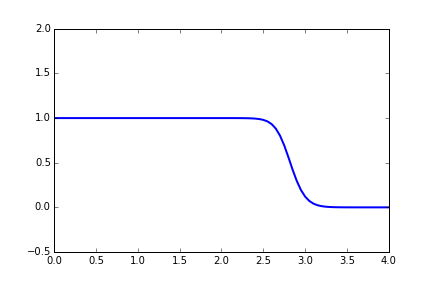
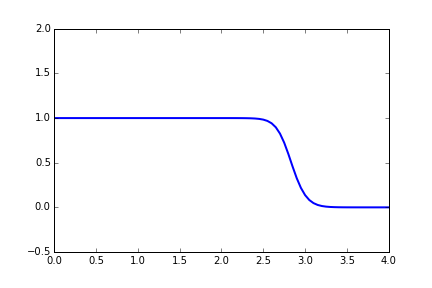

In [10]:
u = u_initial(nx,xend)
sigma = 1
dt = sigma*dx
epsilon = 0.9 # 0 to 1

un = maccormack(u,nt,dt,dx, epsilon)

fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')

In [11]:
def maccormack(u, nt, dt, dx, epsilon):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()
    
    for n in range(1,nt):
        F = computeF(u) #81
        
        ustar[1:-1] = u[1:-1]-dt/dx*(F[2:]-F[1:-1]+epsilon*(u[2:]-2*u[1:-1]+u[0:-2])) #80operation
        
        Fstar = computeF(ustar) #81
        
        #u80operaion ustar80operation Fstar80operation Fstar80operation
        un[n,1:] = .5*(u[1:]+ustar[1:]-dt/dx*(Fstar[1:]-Fstar[0:-1]))
        
        u = un[n].copy()
        
    return un